In [3]:
#http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
from pandas_datareader import data
import pandas as pd

# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'SPY']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
adj_close = panel_data.loc['Adj Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex adj_close using all_weekdays as the new index
adj_close = adj_close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
adj_close = adj_close.fillna(method='ffill')

adj_close.head(10)

,AAPL,MSFT,SPY
2010-01-01,NaN,NaN,NaN
2010-01-04,27.406532,25.148876,96.341141
2010-01-05,27.453915,25.157001,96.596169
2010-01-06,27.017223,25.002611,96.664169
2010-01-07,26.967278,24.742592,97.072220
2010-01-08,27.146566,24.913233,97.395248
2010-01-11,26.907093,24.596333,97.531265
2010-01-12,26.601023,24.433821,96.621658
2010-01-13,26.976244,24.661339,97.437737
2010-01-14,26.820007,25.157001,97.701286


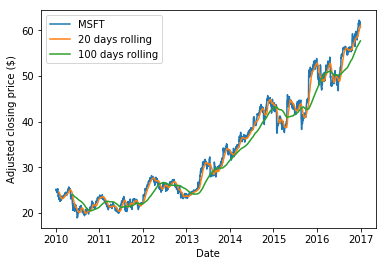

In [6]:
# Get the MSFT time series. This now returns a Pandas Series object indexed by date.
msft = adj_close.loc[:, 'MSFT']
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()